In [1]:
import pandas as pd
import numpy as np

C:\Users\Ayyaz\AppData\Local\Temp\ipykernel_45652\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
players = pd.read_csv("players_22.csv")

C:\Users\Ayyaz\AppData\Local\Temp\ipykernel_45652\2061566770.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [3]:
# Take features from data
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [4]:
# drop null values
players = players.dropna(subset=features)

In [5]:
data = players[features].copy()

In [6]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [7]:
# Normalize data or scaling data
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [9]:
data.describe()


,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [22]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [23]:
# assigning  random centroid from dataset
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1) 

In [24]:
centroids = random_centroids(data, 5)

C:\Users\Ayyaz\AppData\Local\Temp\ipykernel_45652\1665223097.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [25]:
centroids

,0,1,2,3,4
overall,5.130435,5.782609,4.695652,4.913043,5.782609
potential,4.695652,9.695652,5.782609,3.608696,6.652174
wage_eur,1.042918,1.214592,1.042918,1.071531,1.000000
value_eur,1.027888,1.051085,1.027888,1.071704,1.025310
age,7.296296,8.777778,2.851852,5.814815,3.222222


In [26]:
# label each data point according to the distance for each centroid
# assign each data point to the closest cluster (centroid)

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)                        

In [27]:
labels = get_labels(data, centroids)

In [28]:
labels.value_counts()

2    6540
4    5662
0    3570
3    3071
1     322
Name: count, dtype: int64

In [16]:
labels.value_counts()

3    9735
1    6207
0    2069
2    1005
4     149
Name: count, dtype: int64

In [29]:
# updating the centroid based on the mean of the data points in that cluster

def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [30]:
# Graph our clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [31]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

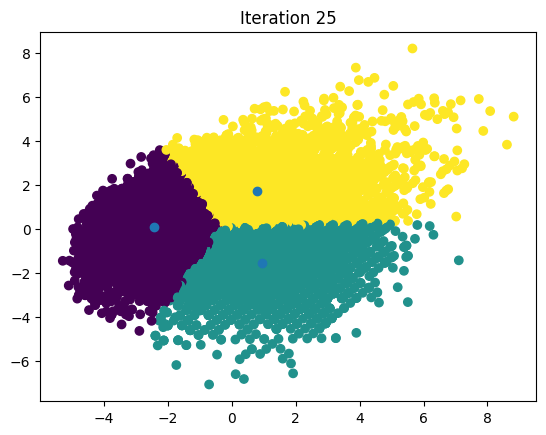

In [32]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [33]:
centroids

,0,1,2
overall,3.443294,5.200401,6.336567
potential,5.362259,4.894314,7.107863
wage_eur,1.031502,1.130802,1.460086
value_eur,1.029525,1.049844,1.313192
age,2.678624,5.962199,3.877681


In [34]:
labels.value_counts()

1    7192
0    6198
2    5775
Name: count, dtype: int64

In [35]:

players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
7025,Sandeiro Leal,68,68,7000.0,1400000.0,21
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [36]:
from sklearn.cluster import KMeans

In [37]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [38]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,5.223367,6.807447,3.881766
potential,4.895880,7.245618,5.672315
wage_eur,1.125427,1.727872,1.044198
value_eur,1.044533,1.458470,1.039609
age,6.115253,4.485576,2.896321
